# Statistics

In [99]:
from collections import Counter
from typing import List
import matplotlib.pyplot as plt
import random

## Generated skewed data

In [100]:
from scipy.stats import skewnorm

skewness = 100
num_numbers = 1000

number_of_friends = skewnorm.rvs(a=skewness, size=num_numbers, scale=10)
number_of_friends = [int(i) for i in number_of_friends]
number_of_friends[0:10]

[12, 10, 0, 5, 1, 25, 14, 10, 3, 17]

In [101]:
friend_counts = Counter(number_of_friends)

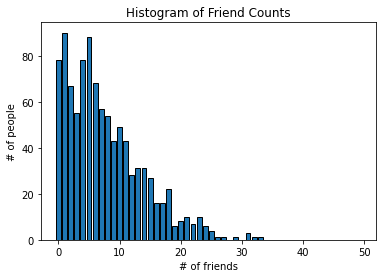

In [102]:
xs = range(50)
ys = [friend_counts[x] for x in xs]

plt.bar(xs, ys, edgecolor='black')

plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")

plt.show()

## Generate Descriptive Statistics

In [103]:
num_observations = len(number_of_friends)

print(f"Number of observations: {num_observations}")

Number of observations: 1000


In [104]:
largest_value = max(number_of_friends)
smallest_value = min(number_of_friends)
                     
print(f"Largest value: {largest_value}")
print(f"Smallest value: {smallest_value}")

Largest value: 33
Smallest value: 0


## Central Tendencies

In [129]:
def mean(xs: List[float]) -> float:
    """Calculate the mean of a list of numbers"""
    return sum(xs)/len(xs)

friends_mean = mean(xs=number_of_friends)
scale_friends_mean = mean(xs=[obs * 10 for obs in number_of_friends])
shift_friends_mean = mean(xs=[obs + 10 for obs in number_of_friends])
outlier_friends_mean = mean(xs=number_of_friends+[1000000])


print(f"mean: {friends_mean}")
print(f"mean scaled (x 10): {scale_friends_mean}")
print(f"mean shifted (+ 10): {shift_friends_mean}")
print(f"mean with outlier: {round(outlier_friends_mean, 2)}")

mean: 7.584
mean scaled (x 10): 75.84
mean shifted (+ 10): 17.584
mean with outlier: 1006.58


In [131]:
def median_odd(xs: List[float], length) -> float:
    """Calculate the median if length of list of numbers is odd"""
    
    return sorted(xs)[length // 2]

def median_even(xs: List[float], length) -> float:\
    """Calculate the median if length of list of numbers is even"""
    midpoint = length / 2
    left_of_midpoint = int(midpoint)
    right_of_midpoint = int(midpoint) + 1
    sorted_list = sorted(xs)
    
    return mean(sorted_list[left_of_midpoint:right_of_midpoint+1])

def median(xs: List[float]) -> float:
    """Calculate the median of a list of numbers"""
    length = len(xs)
    if length % 2 != 0:
        return median_odd(xs, length=length)
    if length % 2 == 0:
        return median_even(xs, length=length)
    
friends_median = median(xs=number_of_friends)
scale_friends_median = median(xs=[obs * 10 for obs in number_of_friends])
shift_friends_median = median(xs=[obs + 10 for obs in number_of_friends])
outlier_friends_median = median(xs=number_of_friends+[1000000])

print(f"median: {friends_median}")
print(f"median scaled (x 10): {scale_friends_median}")
print(f"median shifted (+ 10): {shift_friends_median}")
print(f"median with outlier: {outlier_friends_median}")

median: 6.0
median scaled (x 10): 60.0
median shifted (+ 10): 16.0
median with outlier: 6


In [140]:
def quantile(xs: List[float], p:float) -> float:
    """Returns the p-th percentile value in x"""
    p_index = int(p * len(xs))
    
    return sorted(xs)[p_index]

tenth_percentile = quantile(xs=number_of_friends, p=0.1)
friends_median = quantile(xs=number_of_friends, p=0.5) # AKA median

print(f"10th percentile: {tenth_percentile}")
print(f"median: {median}")

10th percentile: 1
median: 6


In [138]:
def mode(xs: List[float]) -> List[float]:
    """Returns a list, since there might be more than one mode"""
    counts = Counter(number_of_friends)
    max_count = max(counts.values())
    
    return [x_i for x_i, count in counts.items() if count == max_count]

friends_mode = mode(xs=number_of_friends)

print(f"mode: {friends_mode}")

mode: [1]
